In [3]:
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Using TensorFlow backend.
C:\Users\EL FASHKA\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\EL FASHKA\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\EL FASHKA\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\EL FASHKA\anaconda3\lib\site-packages\tensorflow\python\fra

In [4]:
df = pd.read_csv('C:/Users/EL FASHKA/Desktop/FABB/conso.csv', sep = ";",  index_col = 'Date', parse_dates = True)
df 

,Heures,Consommation,Prévision J-1,Prévision J,Solaire
Date,,,,,
2019-01-01,00:00,64267,64200,63800,-2
2019-01-01,00:30,63209,62700,62200,-2
2019-01-01,01:00,60968,60500,60200,-2
2019-01-01,01:30,60772,61100,60900,-2
2019-01-01,02:00,60164,60800,60400,-2
...,...,...,...,...,...
2019-12-31,23:00,66765,67500,68900,-1
2019-12-31,23:15,0,67500,68850,0
2019-12-31,23:30,66520,67500,68800,-1


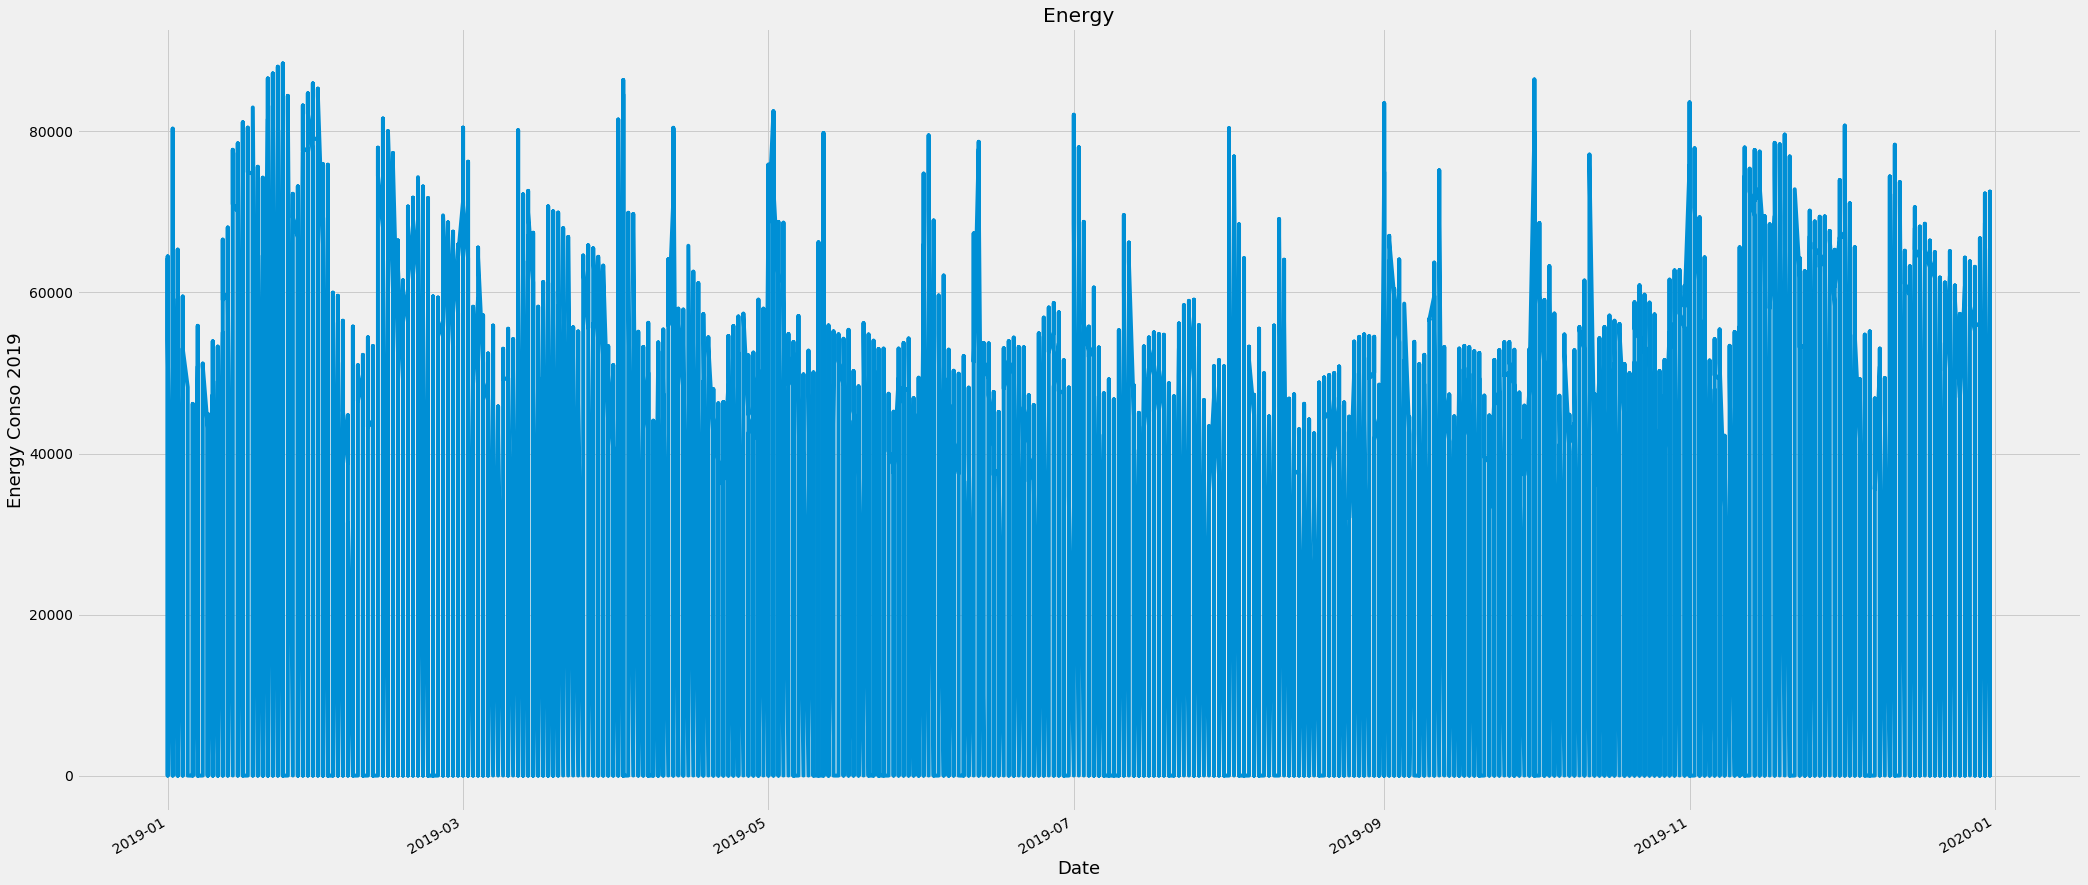

In [5]:
plt.figure(figsize=(32,16))
plt.title('Energy')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Energy Conso 2019', fontsize=18)
df['Consommation'].plot()
plt.show()

In [6]:
data = df.filter(['Consommation'])
dataset = data.values
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

28009

In [7]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.72659129],
       [0.71462973],
       [0.68929339],
       ...,
       [0.75206331],
       [0.        ],
       [0.        ]])

In [8]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.72659129, 0.71462973, 0.68929339, 0.68707744, 0.6802035 ,
       0.67247032, 0.64942906, 0.63191634, 0.61444884, 0.60569813,
       0.59787451, 0.60079141, 0.59773884, 0.60459016, 0.60373092,
       0.60662521, 0.60775579, 0.60356133, 0.60360656, 0.61193895,
       0.62157151, 0.63226682, 0.64286037, 0.65588468, 0.66858112,
       0.68429621, 0.6988355 , 0.68627473, 0.67429056, 0.66428491,
       0.65200678, 0.        , 0.64864895, 0.        , 0.64384398,
       0.        , 0.6454381 , 0.        , 0.65187111, 0.        ,
       0.67597513, 0.        , 0.70018089, 0.        , 0.71518372,
       0.        , 0.72572075, 0.        , 0.72903335, 0.        ,
       0.72533635, 0.        , 0.7149576 , 0.        , 0.70239683,
       0.        , 0.68944036, 0.        , 0.67780667, 0.        ])]
[0.6854946297343132]

[array([0.72659129, 0.71462973, 0.68929339, 0.68707744, 0.6802035 ,
       0.67247032, 0.64942906, 0.63191634, 0.61444884, 0.60569813,
       0.59787451, 0.60079141, 0.597

In [9]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [10]:
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(27949, 60, 1)

In [11]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [12]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [13]:
model.fit(x_train, y_train, batch_size=1, epochs=1)


Epoch 1/1
27949/27949 [==============================] - 1031s 37ms/step - loss: 0.0020


In [14]:
test_data = scaled_data[training_data_len - 60:, :]
x_test = []
y_test =dataset [training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i - 60:i, 0])

In [15]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(7002, 60, 1)

In [16]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [17]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

342.8062952550283

C:\Users\EL FASHKA\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


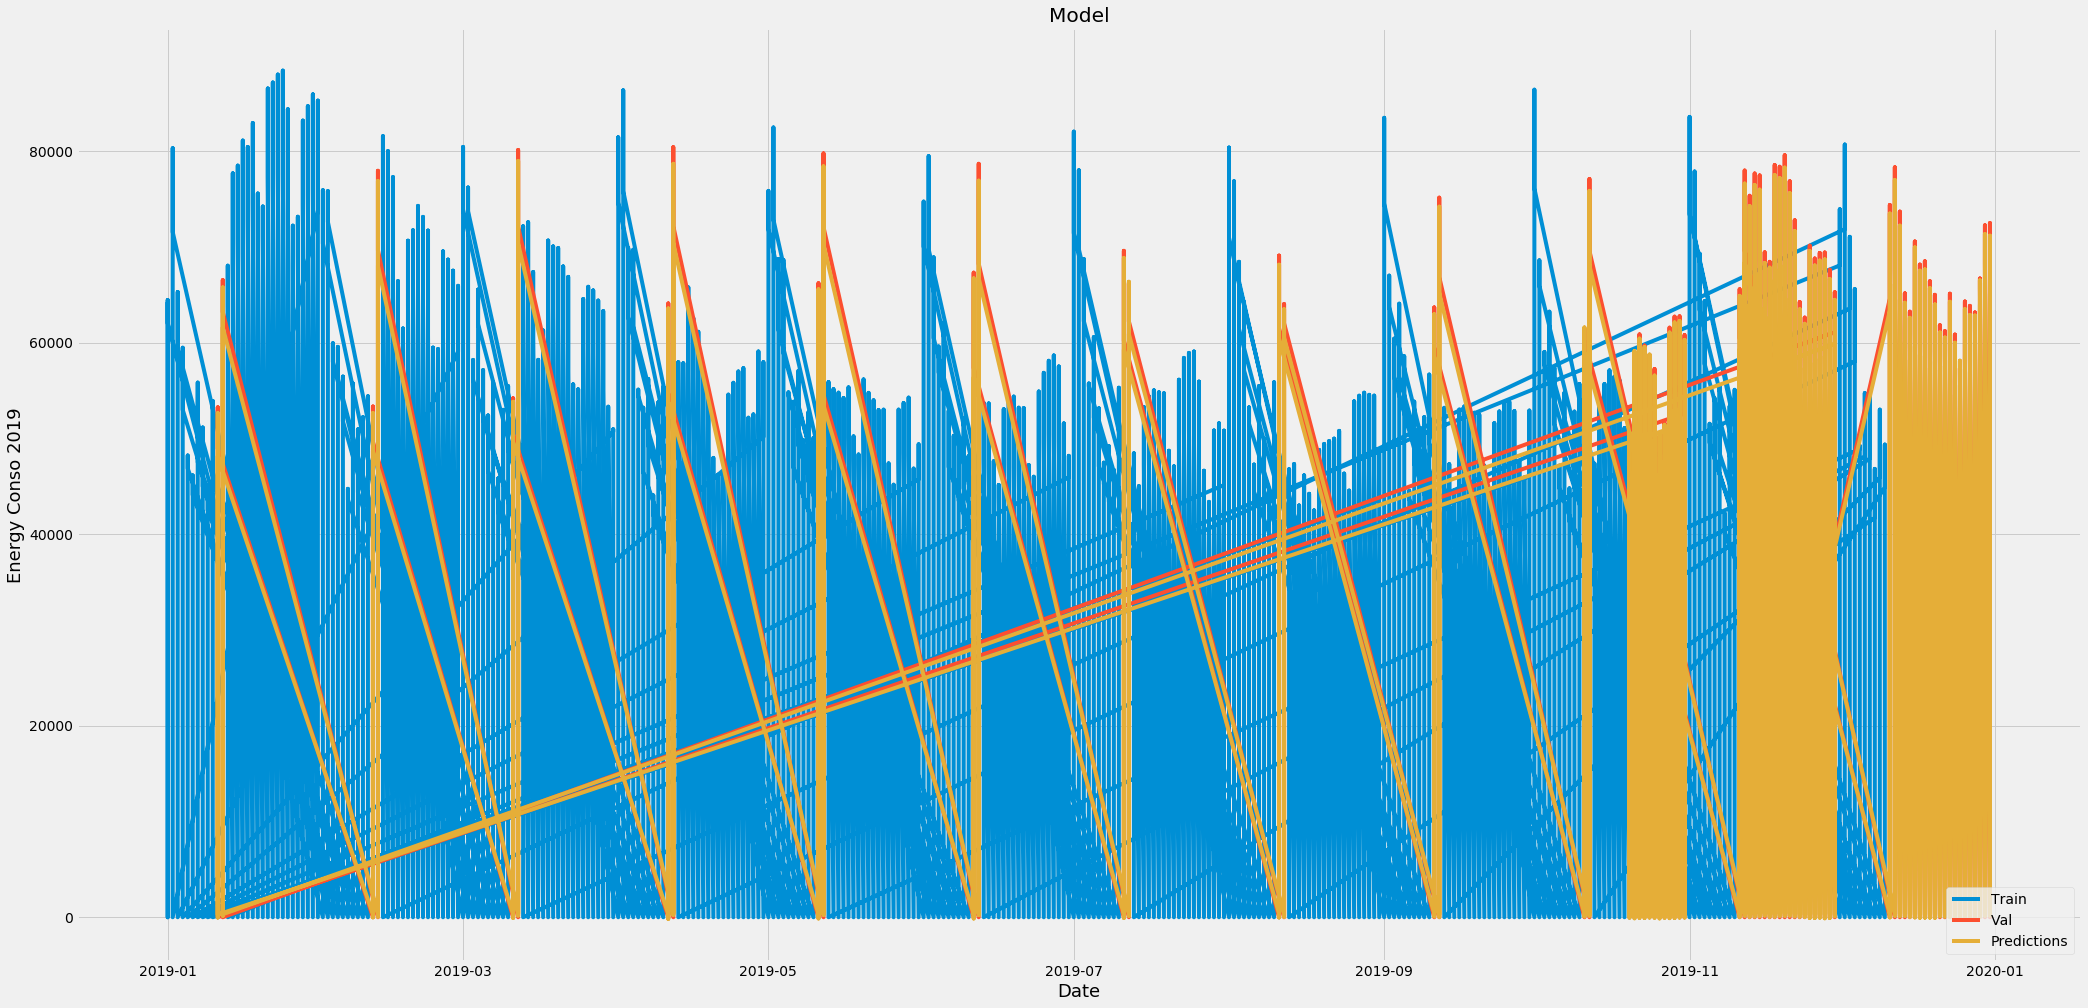

In [18]:
train = data[:training_data_len]
valid = data [training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(32,16))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Energy Conso 2019', fontsize=18)
plt.plot(train['Consommation'])
plt.plot( valid[['Consommation', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc= 'lower right')
plt.show()

In [19]:
valid

,Consommation,Predictions
Date,,
2019-10-20,0,279.458496
2019-10-20,41114,40749.636719
2019-10-20,0,513.590027
2019-10-20,40079,40300.941406
2019-10-20,0,649.748169
...,...,...
2019-12-31,66765,63213.003906
2019-12-31,0,189.571030
2019-12-31,66520,67493.289062


In [ ]:
from pandas.tseries.offsets import DateOffset
add_dates = [df.index[-1] + DateOffset(days= x) for x in range(0,60)]
futures_dates = pd.DataFrame(index=add_dates[1:],columns=df.columns)
futures_dates.tail()
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list), index= futures_dates[-n_input:].index, columns = ['Predictions'] )

df_proj = pd.concat([df,df_predict], axis = 1)
df_proj .tail()